In [3]:
# advance neuro project

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

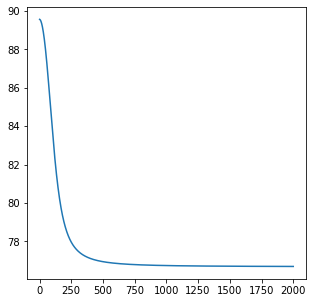

In [6]:
### network parameters - open loop 2 layer network - first condition - auto correlated 

mu = 0
sigma = 1
LR = 0.002

input_layer_size = 20
hidden_layer1_size = 100
hidden_layer2_size = 20

forward_weight_0 = np.random.normal(mu, sigma, size=(input_layer_size,hidden_layer1_size))
forward_weight_1 = np.random.normal(mu, sigma, size=(hidden_layer1_size,hidden_layer2_size))

# here, the network is open loop and the delta2 is created randomly and kept constant during itertions
backward_weight_1 = np.random.normal(mu, sigma, size=(hidden_layer2_size,hidden_layer1_size))

# input layer values

input_layer = np.random.normal(mu, sigma, input_layer_size) # initial value of inputs - constant during iterations
input_layer = input_layer.reshape(1, len(input_layer))
error_delta2 = np.random.normal(mu, sigma, hidden_layer2_size) # initial value of error_delta 2 - constant during iterations
error_delta2 = error_delta2.reshape(1, len(error_delta2))
error_delta1 = np.matmul(error_delta2, backward_weight_1) # initial value of error_delta1 - constant during iterations since
# delta 2 doesn't change

# updating the network parameters
number_of_iterations = 2000
angles1 = np.zeros((number_of_iterations))

for i in range (number_of_iterations):
    hidden_layer_1 = np.matmul(forward_weight_0.T, input_layer.T).T
    delta1 = error_delta1
    forward_weight_0 += LR*np.matmul(input_layer.T,delta1)
    delta2 = error_delta2
    forward_weight_1 += LR*np.matmul(hidden_layer_1.T,delta2)
    angles1[i] = angleCal(forward_weight_1, backward_weight_1.T)
    
fig, ax = plt.subplots(1,1,figsize=(5,5))
ax.plot(np.arange(1,number_of_iterations+1),angles1)


In [153]:
def ReLU(x):
    output = np.zeros((x.shape[1]))
    x = np.squeeze(x)
    for i in range (output.shape[0]):
        if(x[i] <= 0):
            output[i] = 0
        else:
            output[i] = x[i]
    output = output.reshape(1, len(output))
    return output

In [154]:
def ReLU_deriv(x):
    output = np.zeros(x.shape[1])
    x = np.squeeze(x)
    for i in range (output.shape[0]):
        if(x[i] <= 0):
            output[i] = 0
        else:
            output[i] = 1
    output = output.reshape(1, len(output))
    return output

In [4]:
def angleCal(A, B):
    num = np.trace(np.matmul(np.conjugate(A.T), B))
    norm_A = math.sqrt(np.trace(np.matmul(A,np.conjugate(A.T))))
    norm_B = math.sqrt(np.trace(np.matmul(B,np.conjugate(B.T))))
    denum = norm_A*norm_B
    angle = np.arccos(num/denum)*180/math.pi
    return angle

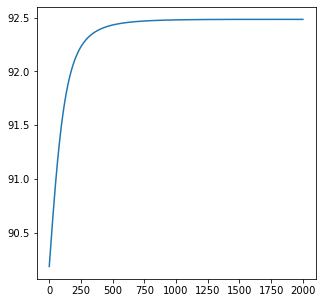